1. Implement K-NN Classifier for classification of any dataset of your choice.
a. Load an existing data set
b. Split the data set to train and test sets
c. Test your model using test set. Find accuracy and confusion Matrix.
d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs
accuracy” and find out the value of k for maximum accuracy for the test samples.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Social_Network_Ads.csv')
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [2]:
X = df.iloc[:, [2,3]].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
def eucledian_distance(a, b):
  return np.sqrt(np.sum((a-b)**2))

def manhattan_distance(a, b):
  return np.sum(np.abs(a-b))

In [4]:
class KNN:
  def __init__(self, k, distance_metric=eucledian_distance):
    self.k = k
    self.distance_metric = distance_metric
    self.X_train = None
    self.y_train = None

  def fit(self, X, y):
    self.X_train = np.array(X)
    self.y_train = np.array(y)

  def predict(self, X):
    predictions = []
    for i in range(len(X)):
      euclidean_distances = [self.distance_metric(X[i], x_train) for x_train in self.X_train]
      k_indices = np.argsort(euclidean_distances)[:self.k]
      k_nearest_labels = [self.y_train[i] for i in k_indices]
      most_common = Counter(k_nearest_labels).most_common(1)
      predictions.append(most_common[0][0])
    return predictions

In [5]:
clf = KNN(k=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [6]:
# Accuracy function
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)

# Confusion matrix function
def confusion_matrix(y_true, y_pred, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true_label, pred_label in zip(y_true, y_pred):
        matrix[true_label][pred_label] += 1
    return matrix

In [7]:
num_classes = len(np.unique(y))
conf_matrix = confusion_matrix(y_test, y_pred, num_classes)
acc = accuracy(y_test, y_pred)
print("Accuracy:", acc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8375
Confusion Matrix:
[[46  6]
 [ 7 21]]


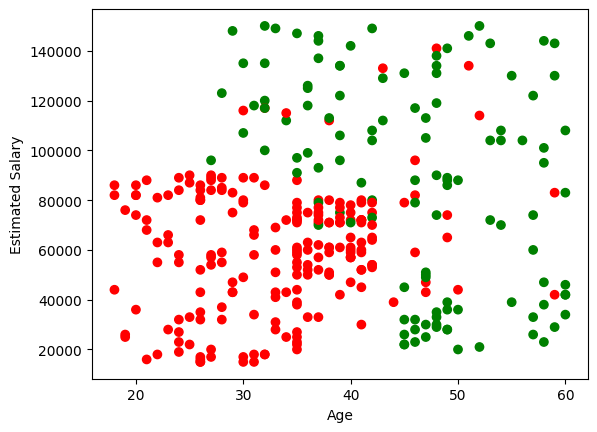

In [8]:
colors = np.where(y_train == 1, 'green', 'red')
plt.scatter(X_train[:,0], X_train[:,1], color=colors)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.show()

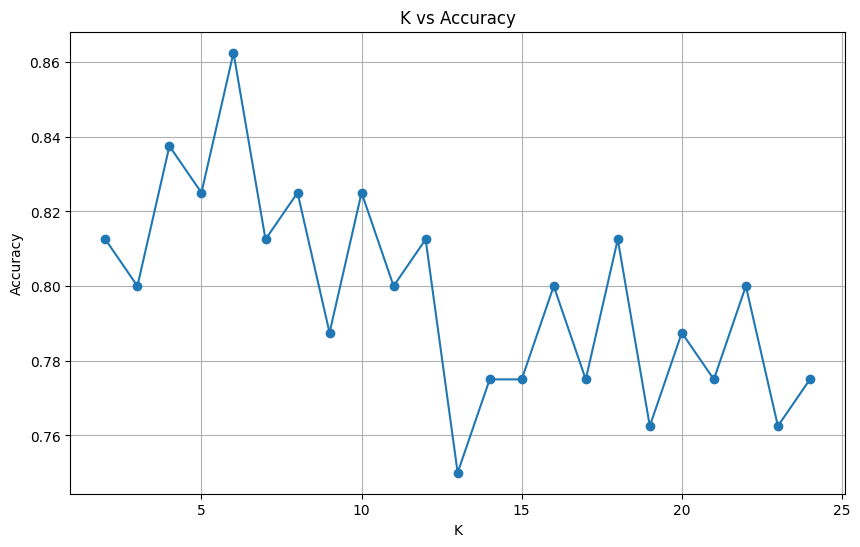

In [9]:
# k vs accuracy plot
k_values = range(2, 25)
accuracies = []

for k in k_values:
    clf = KNN(k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [10]:
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best K: {best_k} with accuracy: {best_accuracy:.4f}")

Best K: 6 with accuracy: 0.8625


In [11]:
best_clf = KNN(k=best_k)
best_clf.fit(X_train, y_train)
best_y_pred = best_clf.predict(X_test)
print("Accuracy:",accuracy(y_test, best_y_pred))
print(confusion_matrix(y_test, best_y_pred, num_classes))

Accuracy: 0.8625
[[47  5]
 [ 6 22]]
